# Kernel Methods

In these notes, we'll introduce the idea of *kernel methods*. Kernel methods can be seen as an extension of the idea of feature maps. Instead of choosing a specific vector of features to compute for each data point, we'll instead compute a series of *comparisons between data points* through the lens of a certain function. Surprisingly, we'll see that this series of comparisons allows us to work with very complex -- even infinite-dimensional! -- feature spaces. 




## $\hat{\mathbf{w}}$ Lies in the Span of the Data 



Let's start with a theorem about a broad class of linear models. Recall that we are working with the empirical risk minimization problem 

$$
\DeclareMathOperator*{\argmin}{argmin}
\begin{aligned}
\hat{\mathbf{w}} &= \argmin_{\mathbf{w}} L(\mathbf{w}) \\ 
&= \argmin_{\mathbf{w}} \frac{1}{n}\sum_{i = 1}^n \ell(\langle \mathbf{w}, \phi(\mathbf{x}_i)\rangle, y_i) + \lambda R(\mathbf{w})\;,
\end{aligned}
$${#eq-erm}

where $R(\mathbf{w})$ is a regularizer such as the $\ell_1$ or $\ell_2$ norm. 


::: {.callout-note}
::: {#thm-span} 

## $\hat{\mathbf{w}}$ is spanned by the predictor data

Let $\hat{\mathbf{w}}$ be the solution to @eq-erm. Then, there exists a vector $\hat{\mathbf{a}} \in \mathbb{R}^n$ such that $\hat{\mathbf{w}} = \sum_{i = 1}^{n} \hat{a}_{i} \phi(\mathbf{x}_i)  = \Phi(\mathbf{X})^T\hat{\mathbf{a}}$. 

:::
:::

This theorem can be proven with fundamental linear algebraic methods. We can also prove it for a special case using gradient descent when $R$ is the $\ell_2$ penalty $R(\mathbf{w}) = \lVert \mathbf{w} \rVert$. Assume that the learning rate $\alpha$ is small enough that gradient descent is guaranteed to converge, and that the feature matrix $\Phi(\mathbf{x})$ is centered.[The centering assumption allows us to regularize $\mathbf{w}$ without worrying about a constant feature; centering guarantees that the corresponding entry of $\mathbf{w}$ will be zero.]{.alert} Suppose that we initialize gradient descent with initial iterate $\mathbf{w}^{(0)} = \mathbf{0}$. Define $b_i^{(j)} = -\frac{\alpha}{n}\frac{d\ell(\langle \mathbf{w}^{(j)}, \phi(\mathbf{x}_i) \rangle, y_i)}{ds}$ and $a_{i}^{(j)} = (1 + 2\alpha)^{}$ Then, using our formulae for the gradient of the empirical risk from @eq-empirical-risk-gradient, we have 

$$
\begin{aligned}
    \mathbf{w}^{(1)} &= \mathbf{0} - \frac{\alpha}{n} \sum_{i = 1}^n  \frac{d\ell(\langle \mathbf{w}^{(0)}, \phi(\mathbf{x}_i) \rangle, y_i)}{ds} \phi(\mathbf{x}_i) + 2\alpha \mathbf{w}^{(0)}\\ 
    &= \sum_{i = 1}^n b_i^{(0)}\phi(\mathbf{x}_i)\;. 
\end{aligned}
$$

Thus, $\mathbf{w}^{(1)}$ is a linear combination of feature vectors $\phi(\mathbf{x}_i)\$. 

The next iteration is 

$$
\begin{aligned}
     \mathbf{w}^{(2)} &= \mathbf{w}^{(1)} - \frac{\alpha}{n} \sum_{i = 1}^n  \frac{d\ell(\langle \mathbf{w}^{(1)}, \phi(\mathbf{x}_i) \rangle, y_i)}{ds}\phi(\mathbf{x}_i)  - 2\alpha \mathbf{w}^{(1)}\\ 
     &= \sum_{i = 1}^n (1 - 2\alpha)b_i^{(0)}\phi(\mathbf{x}_i) - \sum_{i = 1}^n b_i^{(1)}\phi(\mathbf{x}_i) \\ 
     &= \sum_{i = 1}^n \left( (1 - 2\alpha) b_i^{(0)} + b_i^{(1)}\right)\phi(\mathbf{x}_i)\;,
\end{aligned}
$$

which is again a linear combination of feature vectors. We can continue in this fashion inductively, proving that 

$$
\begin{aligned}
    \mathbf{w}^{(t)} = \sum_{i = 1}^n a_{i}^{(t)} \phi(\mathbf{x}_i)
\end{aligned}
$$

for some constants $\hat{a}_i^{(t)}$.[In our argument above, $a_{i}^{(1)} = b_i^{(0)}$ and $\hat{a}_{i}^{(2)} = (1 - 2\alpha) b_i^{(0)} + b_i^{(1)}$.]{.aside} Continuing in this fashion and passing to the limit $\hat{a}_{i}^{(t)} \rightarrow \hat{a}_i$ as $t\rightarrow \infty$ [Passing to the limit is justified because we assume $\alpha$ to be small enough that gradient descent converges ]{.aside}, 

$$
\begin{aligned}
    \hat{\mathbf{w}} &= \sum_{i = 1}^n \hat{a}_i \phi(\mathbf{x}_i) \\ 
                     &= \Phi(\mathbf{X})^T\hat{\mathbf{a}}\;,
\end{aligned}
$$

as was to be shown. In the last line, we have used the definition of matrix multiplication. 

## The Kernel Matrix

What does @thm-span get us? To see what it gets us, let's use ridge regression as a running example. Ignoring factors of $\frac{1}{n}$ for convenience, the ridge-regression objective function is 

$$
\begin{aligned}
    L(\mathbf{w}) &= \lVert \Phi(\mathbf{X})\mathbf{w} - \mathbf{y} \rVert_2^2 + \lambda \lVert \mathbf{w} \rVert_2^2\;. \\ 
    &= \lVert \Phi(\mathbf{X})\mathbf{w} - \mathbf{y} \rVert_2^2 + \lambda \mathbf{w}^T\mathbf{w}\;.
\end{aligned}
$$

Let's plug in the equation $\mathbf{w} = \Phi(\mathbf{X})^T\mathbf{a}$ from @thm-span. This allows us to re-express the loss as a function of the vector $\mathbf{a}$. 

$$
\begin{aligned}
    L(\mathbf{a}) &= \lVert\Phi(\mathbf{X})\Phi(\mathbf{X})^T\mathbf{a} - \mathbf{y}\rVert_2^2+ \lambda \mathbf{a}^T\Phi(\mathbf{X})\Phi(\mathbf{X})^T\mathbf{a}\;.
\end{aligned}
$$

Let's define the *kernel matrix* $\mathbf{K} = \Phi(\mathbf{X})\Phi(\mathbf{X}) ^T \in \mathbb{R}^{n\times n}$. The entries of $\mathbf{K}$ are $k_{ij} = k(\mathbf{x}_i, \mathbf{x}_j) = \phi(\mathbf{x}_i)^T \phi(\mathbf{x}_j) = \langle \phi(\mathbf{x}_i), \phi(\mathbf{x}_j) \rangle$. By construction, $\mathbf{K}$ is symmetric: $\mathbf{K} = \mathbf{K}^T$. 

Then, 

$$
\begin{aligned}
    L(\mathbf{a}) &= \lVert\mathbf{K}\mathbf{a} - \mathbf{y}\rVert_2^2 + \lambda \mathbf{a}^T\mathbf{K}\mathbf{a}\;.
\end{aligned}
$$

This looks quite similar to our old ridge-regression problem. Let's again take the gradient, this time with respect to $\mathbf{a}$, and solve for the optimal choice $\hat{\mathbf{a}}$: 

$$
\begin{aligned}
    \nabla L(\mathbf{a}) &= 2\mathbf{K}(\mathbf{K}\mathbf{a} - \mathbf{y}) + 2\lambda K\mathbf{a} \\ 
    &= 2\mathbf{K}(\mathbf{K} + \lambda\mathbf{I})\mathbf{a} - 2\mathbf{K}\mathbf{y}\;.
\end{aligned}
$$

Setting the equation $\nabla L(\hat{\mathbf{a}}) = \mathbf{0}$ and solving for $\hat{\mathbf{a}}$ yields the formula 

$$
\begin{aligned}
    \hat{\mathbf{a}} = (\mathbf{K} + \lambda \mathbf{I})^{-1}\mathbf{y}\;.
\end{aligned}
$${#eq-kernel-ridge}

[Once we have the optimal $\hat{\mathbf{a}}$, we could if we wanted convert back to the optimal $\hat{\mathbf{w}}$ using @thm-span.]{.aside}

To make a prediction at a data point $\mathbf{x}$, we compute 

$$
\begin{aligned}
s &= \langle \phi(\mathbf{x}), \hat{\mathbf{w}} \rangle \\ 
  &= \langle \phi(\mathbf{x}), \Phi(\mathbf{X})^T\hat{\mathbf{a}}\rangle \\ 
  &= \sum_{i = 1}^n \hat{a}_i k(\mathbf{x}, \mathbf{x}_i)\;,
\end{aligned}
$${#eq-kernel-predictor}

where again each $k(\mathbf{x}, \mathbf{x}_i) = \langle \phi(\mathbf{x}), \phi(\mathbf{x}_i) \rangle$.

So far, this is all just different notation for the same ridge regression that we talked about previously. What's the point? 


## The Kernel Trick

Let's remind ourselves: where is the feature matrix $\Phi(\mathbf{X})$ in @eq-kernel-ridge? It appears only through the kernel matrix $\mathbf{K} = \Phi(\mathbf{X})\Phi(\mathbf{X})^T$ with entries $k_{ij} = k(\mathbf{x}_i, \mathbf{x}_j) = \langle \phi(\mathbf{x}_i), \phi(\mathbf{x}_j) \rangle$. This means that as long as we know how to calculate these inner products, we never actually have to explicitly compute any of the features $\phi(\mathbf{x})$. This idea, though simple, is so fundamental that it has an informal name -- it's the "kernel trick."

::: {.callout-note}

## Kernel Trick

Suppose that we can find some function $k:\mathbb{R}^p\times \mathbb{R}^p \rightarrow \mathbb{R}$ and some feature map $\phi$ with the property that $k(\mathbf{x}_i, \mathbf{x}_j) = \langle \phi(\mathbf{x}_i), \phi(\mathbf{x}_j) \rangle$. Then, computing @eq-kernel-ridge and making predictions via @eq-kernel-predictor is equivalent to doing regular ridge regression with feature map $\phi$. 

:::

## Positive-Definite Kernels

When does a candidate function $k$ have the property that $k(\mathbf{x}_i, \mathbf{x}_j) = \langle \phi(\mathbf{x}_i), \phi(\mathbf{x}_j) \rangle$ for some $\phi$? The fundamental property for which we can check is called *positive-definiteness*: 

::: {.callout-note}

## Positive-Definite Kernel

A matrix $\mathbf{K} \in \mathbb{R}^{n\times n}$ is *positive definite* if, for any vector $\mathbf{z} \in \mathbb{R}^n$, $\mathbf{z}^T\mathbf{K}\mathbf{z} > 0$. 

A function $k:\mathbb{R}^p \times \mathbb{R}^p \rightarrow \mathbb{R}$ is a *positive definite kernel* if, for any matrix $\mathbf{X}\in \mathbb{R}^{n \times p}$, the matrix $\mathbf{K} \in \mathbb{R}^{n\times n}$ with entries $k_{ij} = k(\mathbf{x}_i, \mathbf{x}_j)$ is a positive definite matrix. 

:::

There are a number of rules for deriving examples of positive-definite kernels, as well as some famous examples (for a fairly complete guide, see [Section 6.2](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf#page=314) of @bishopPatternRecognitionMachine2006). 

In fact, it's not even necessary that $k$ give inner products for *finite* feature spaces! For example, the Gaussian radial basis function (RBF) kernel has formula 

$$
\begin{aligned}
    k(\mathbf{x}_i, \mathbf{x}_j) = e^{-\gamma\lVert \mathbf{x}_i - \mathbf{x}_j \rVert^2_2}\;.
\end{aligned}
$$

Here, $\gamma$ is a tunable parameter called the *bandwidth*. It may not be obvious that this is a valid positive-definite kernel, but you can check @bishopPatternRecognitionMachine2006 for an argument that it is. The RBF kernel does not correspond to any finite-dimensional feature space -- it actually gives the inner product for an *infinite*-dimensional vector space. [Technically, it describes the inner product in a certain Hilbert space.]{.aside} So, if we can calculate the RBF kernel, then we can use *infinitely* many features with finite compute time. 

Here's an implementation of the RBF kernel: 

In [9]:
#| code-fold: true
import torch
from matplotlib import pyplot as plt

from itertools import product
plt.style.use('seaborn-v0_8-whitegrid')

In [10]:
#---
def rbf_kernel(X_1, X_2, gamma):
    return torch.exp(-gamma*torch.cdist(X_1, X_2)**2)
#---

Here is a visualization of the RBF kernel for an array of values of $x_1$ and $x_2$. 

[Text(0.5, 0, '$x_2$'), Text(0, 0.5, '$x_1$')]

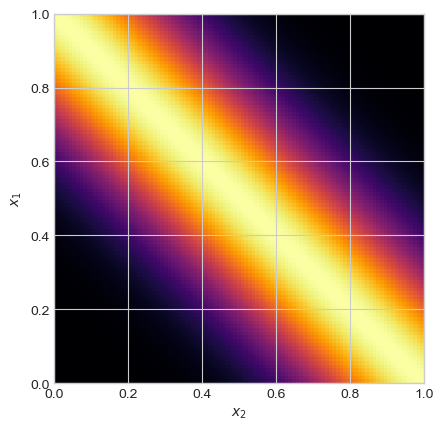

In [11]:
#| code-fold: true
x1 = torch.linspace(0, 1, 101)[:, None]
x2 = torch.linspace(0, 1, 101)[:, None]

plt.imshow(rbf_kernel(x1, x2, 10), cmap = "inferno", extent = [0, 1, 0, 1])
plt.gca().set(xlabel = r"$x_2$", ylabel = r"$x_1$")

There are *many* other kernels, and for a long time the engineering of new kernels for different machine learning domain areas was at the forefront of research. 


## Implementing Kernel Ridge Regression

Let's now implement kernel ridge regression from @eq-kernel-ridge. Here's some data with a nonlinear trend. 

In [12]:
#| code-fold: true
from matplotlib import pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

def regression_data(n = 100, w = torch.Tensor([-0.7, 0.5]), phi = lambda x: x, x_max = 1):

    X = torch.zeros(n, 2)
    x = torch.rand(n)*x_max
    x, ix = torch.sort(x)
    X[:, 1] = x
    X[:, 0] = torch.ones(n)

    X = X - X.mean(dim = 0,keepdims = True)

    y = phi(X)@w + 0.05*torch.randn(n)
    y = y - y.mean()
    return X, y


def plot_regression_data(X, y, ax = None, legend = True, xlabel = True, ylabel = True, title = None):
    
    if ax is None: 
        fig, ax = plt.subplots(1, 1, figsize = (6, 4))

    if xlabel: 
        labels = ax.set(xlabel = "Feature (x)")
    if ylabel: 
        labels = ax.set(ylabel = "Target (y)")
    if title: 
        t = ax.set(title = title)


    ax.scatter(X[:,1], y, facecolors = "none", edgecolors = "steelblue", label = "data")
    if w is not None: 
        m_points = 1001
        X_ = torch.zeros(m_points, 2)
        x = torch.linspace(X[:,1].min().item()-0.01, X[:,1].max().item()+0.01, m_points)
        X_[:,1] = x
        X_[:, 0] = torch.ones(m_points)
        X_ = X_ - X_.mean(dim = 0,keepdims = True)

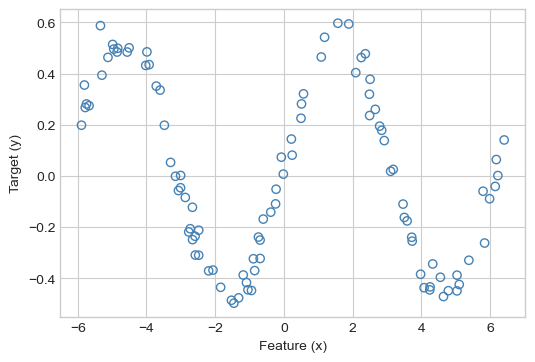

In [13]:
w = torch.Tensor([0.4, 0.5])

X, y = regression_data(w = w, phi = torch.sin, x_max = 4*torch.pi)
plot_regression_data(X, y)

Now we'll implement kernelized ridge regression. We'll implement a class to hold instance variables and implement the mathematics described by @eq-kernel-ridge and @eq-kernel-predictor. Since we don't need to do any gradient descent with this class, we'll implement it using the standard `sklearn` API. 

In [14]:
class KernelRidgeRegression:

    def __init__(self, kernel, lam, **kwargs):
        self.lam    = lam     # regularization strength
        self.kernel = kernel  # kernel used
        self.kwargs = kwargs  # keyword arguments passed to kernel

    def fit(self, X, y):
        """
        implements eq. 12.2
        Also saves the training data, since this is needed for prediction
        """
        n = X.size(0) if isinstance(X, torch.Tensor) else len(X)
        I = torch.eye(n)
        
        #---
        # compute the kernel matrix
        K = self.kernel(X, X, **self.kwargs)                       

        # perform the fit
        self.a = torch.inverse(K + self.lam*I)@y

        
        # save the training data: we'll need it for prediction
        self.X_train = X
        #---
        
    def predict(self, X):
        """
        implements eq. 12.3
        """
        # compute the kernel matrix of the new data with the training data
        #---
        k = self.kernel(X, self.X_train, **self.kwargs)

        # compute the predictions
        s = k@self.a
        
        return s 
        #---

We'll use the `rbf_kernel` from before to fit our model. 

In [15]:
#---
KR = KernelRidgeRegression(rbf_kernel, lam = .1, gamma = 0.02)
KR.fit(X, y)
#---

Now let's visualize: 

In [18]:
#| code-fold: true
def plot_model(X, y, KR, **kwargs):

    fig, ax = plt.subplots(1, 1)    

    plot_regression_data(X, y, ax)
    m_points = 101
    X_ = torch.zeros(m_points, 2)
    x = torch.linspace(X[:,1].min().item()-0.01, X[:,1].max().item()+0.01, m_points)
    X_[:,1] = x
    X_[:, 0] = torch.ones(m_points)

    s = KR.predict(X_)
    ax.plot(x, s, **kwargs)

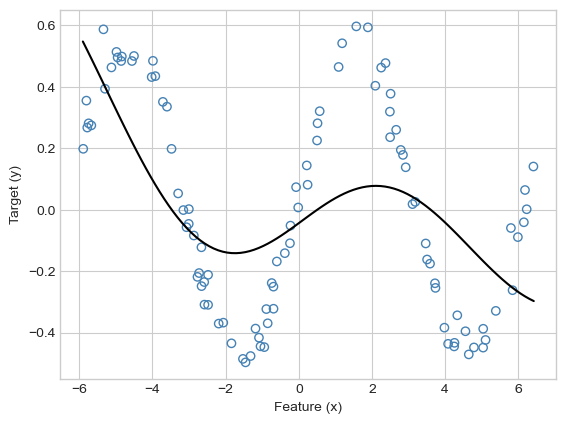

In [19]:
plot_model(X, y, KR, color = "black")

Hmmmm, that doesn't look so good. Clearly "an attempt was made," but the model is not flexible enough to model the pattern in the data. Let's increase $\gamma$: 


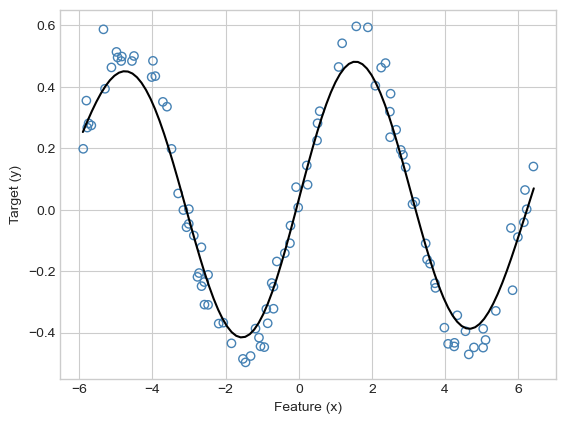

In [33]:
#---
KR = KernelRidgeRegression(rbf_kernel, lam = .1, gamma = .1)
KR.fit(X, y)
plot_model(X, y, KR, color = "black")
#---

Much nicer! As usual, other combinations of $\gamma$ and $\lambda$ can result in undesirably wiggly models that may reflect overfitting or numerical issues. These issues can often be addressed via cross-validation. 

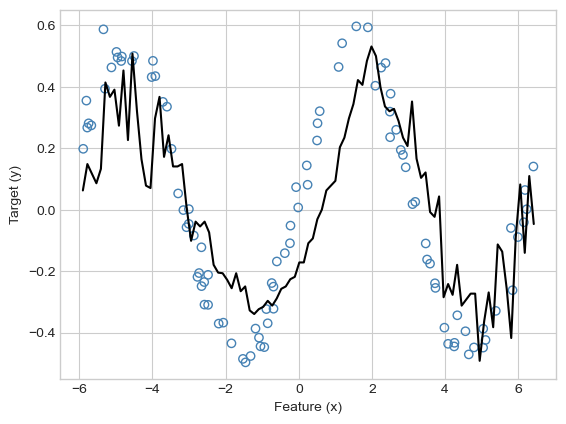

In [42]:
KR = KernelRidgeRegression(rbf_kernel, lam = 0.000001, gamma = .5)
KR.fit(X, y)
plot_model(X, y, KR, color = "black")

## Other Kernelized Models

In this example we studied kernelized linear regression. It is also possible to apply the kernel trick to several other linear models, including logistic regression. The most famous kernel method for classification is the *support vector machine*, which has the benefit of driving most of the entries of $\mathbf{a}$ to zero. This results in *sparsity*, a very favorable attribute in kernel models. Training support vector machines requires some tools in optimization theory beyond the scope of this course. 

## Application: Kernelized Sentiment Analysis

In addition to giving us a flexible way to model nonlinear patterns in data, the kernel trick also gives us a helpful way to represent predictor data that isn't natively in the form of a feature matrix. For example, let's use kernel ridge regression to perform *sentiment analysis* on a small data set of Yelp reviews. [I retrieved this data from [HuggingFace.co](https://huggingface.co/datasets/yelp_review_full/blob/main/yelp_review_full/train-00000-of-00001.parquet).]{.aside} Our task is to predict the score (from 0 to 4) based on the words in the review. [The first time you work with stopwords in the NLTK package, you may need to run `nltk.download('stopwords')`.]{.aside}

In [43]:
#| output: false
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
import pandas as pd
import string
import math

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/philchodrow/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


First let's download the data and do a train-test split. 

In [ ]:
url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/yelp-reviews/reviews-subset.csv"

df = pd.read_csv(url)
x, y = df["text"], df["label"]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.6)

We have a total of 3000 reviews in the training set: 

In [46]:
x_train

4979    Don't call this landscaping company unless you...
3942    Starting Off The Night.... They forced me to r...
4443    Thank you for making a beautiful ring! Sylvia ...
3016    It's a bar...like the movie Coyote Ugly.  Girl...
3852    These guys don't seem to be able to keep staff...
                              ...                        
465     For my birthday, the wife planned a trip to tr...
3433    Haven't been here in like 3 years because last...
1943    The food was brought out HOT, just what you'd ...
4685    The kind of Thai food you want in the neighbor...
3204    All the previous reviews on here are for dinin...
Name: text, Length: 3000, dtype: object

Each review is accompanied by a numerical rating from 0 to 4. 

In [48]:
y_train

4979    0
3942    1
4443    3
3016    1
3852    1
       ..
465     2
3433    0
1943    0
4685    3
3204    3
Name: label, Length: 3000, dtype: int64

To use kernelized ridge regression, all we need to do is define a positive-definite kernel function that accepts two strings of text as inputs. For today, we'll simplistically model a string as a set of unique words, ignoring repetition and word order. [If you would like to learn to make better assumptions about how to handle text, take a course in natural language processing!]{.aside} To compare two sets of words, we'll use the *cosine similarity kernel*. If $A$ and $B$ are two sets, the cosine similarity of $A$ and $B$ is 
$$
\begin{aligned}
    k(A, B) = \frac{\lvert A\cap B \rvert}{\sqrt{\lvert A \lvert \times \lvert B\rvert}}\;.
\end{aligned}
$$


For example, let sentence $s_1 = $ "I love cats" and let $s_2 = $ "I love dogs". There are two words shared between these sentences, and each has length $3$. So, the cosine similarity is $\frac{2}{\sqrt{3\times 3}} = \frac{2}{3}$.

The following functions implement cosine similarity for sets of words. There is some minimal text processing to be done: we remove common stopwords,  punctuation, and casing. 

In [50]:
stopwords = stopwords.words('english')
translator = str.maketrans('', '', string.punctuation)

# data prep: remove stopwords and punctuation, and transform sentence into set of words. 
def process_text(t):
    t = t.translate(translator)
    s = set(t.split())
    s = {word for word in s if word not in stopwords}
    return s

# implement the kernel. 
# sadly, this one has to be done with for-loops. 
def cosine_similarity_kernel(X_1, X_2):
    
    # initialize empty kernel matrix
    K = torch.zeros((len(X_1), len(X_2)))

    # lists of processed sets of words
    S_1 = [process_text(X_1.iloc[i]) for  i in range(len(X_1))]
    S_2 = [process_text(X_2.iloc[i]) for  i in range(len(X_2))]

    # all the math is here! 
    for i, j in product(range(len(S_1)), range(len(S_2))):
        
        s1, s2 = S_1[i], S_2[j]
        K[i, j] = len(s1.intersection(s2)) / (math.sqrt(len(s1)*len(s2)))

    return K

This kernel accepts text as input -- no feature matrix required! 

In [53]:
x = x_train.head(5)
x

4979    Don't call this landscaping company unless you...
3942    Starting Off The Night.... They forced me to r...
4443    Thank you for making a beautiful ring! Sylvia ...
3016    It's a bar...like the movie Coyote Ugly.  Girl...
3852    These guys don't seem to be able to keep staff...
Name: text, dtype: object

In [54]:
#---
cosine_similarity_kernel(x, x)
#---

tensor([[1.0000, 0.0473, 0.0434, 0.0280, 0.0833],
        [0.0473, 1.0000, 0.0000, 0.0000, 0.1113],
        [0.0434, 0.0000, 1.0000, 0.0000, 0.0383],
        [0.0280, 0.0000, 0.0000, 1.0000, 0.0000],
        [0.0833, 0.1113, 0.0383, 0.0000, 1.0000]])

Now that we've implemented a kernel that accepts text directly, we can fit our kernel ridge regression *directly on the list of reviews*. This is our first and really only time in this course where we will be able to fit a model directly on a data set without first transforming it into a feature matrix. 

In [55]:
#---
KR = KernelRidgeRegression(cosine_similarity_kernel, lam = 0.01)
KR.fit(x_train, y_train)
#---

This calculation is relatively slow. Why? The two computational bottlenecks are: 

1. Computing the kernel matrix, which has $3000^2 = 9,000,000$ entries.
2. Inverting the kernel matrix, which has complexity of roughly $O(n^3)$.

We can similarly extract predictions on the test data, which will again take some time. 

In [56]:
#---
preds = KR.predict(x_test)
#---

It can be hard to visualize these predictions because we never explicitly formed a feature matrix. One way to visually assess quality is to view the mean of the predictions as a function of the observed scores on the test set. 

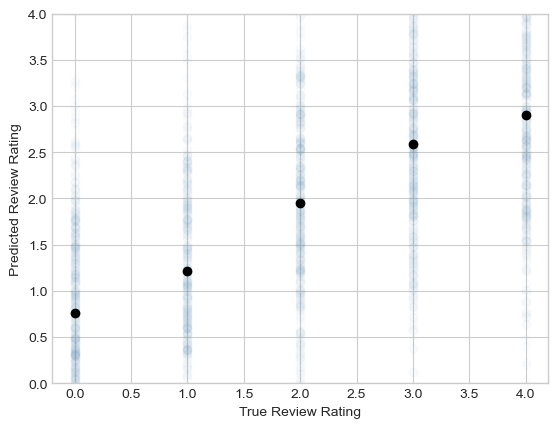

In [57]:
plt.scatter(y_test, preds, alpha = 0.01)
for i in range(5):
    mean_pred = preds.numpy()[y_test == i].mean()
    plt.scatter([i], [mean_pred], color = "black")
labs = plt.gca().set(xlabel = "True Review Rating", ylabel = "Predicted Review Rating", ylim = (0, 4))

The predictions are pretty noisy and not perfectly lined up with the actual ratings. That said, we observe a consistent trend in which the model gives higher predicted ratings to reviews that did indeed have higher ratings. 

To confirm, let's look at some of the best and worst reviews. 


In [174]:
#| code-fold: true

bottom_reviews = x_test.iloc[preds.argsort().numpy()[:5]]
top_reviews    = x_test.iloc[preds.argsort().numpy()[-5:]]

print("BEST REVIEWS")
print("------------")
for text in top_reviews: 
    print(text)

print("\nWORST REVIEWS")
print("------------")
for text in bottom_reviews: 
    print(text)

BEST REVIEWS
------------
This is the best place for a couple of slices in all of AZ (period!)
The service was amazing and food delicious
Everything we got was amazing, the cheese curds were perfect. I can honestly say this was the best burger I have had in Madison. The Prime Rib was delicious as well. Great atmosphere. Best bar
Really good gyros... best I've had in Phoenix
Delicious and everyone there is so friendly!

WORST REVIEWS
------------
terrible.
bland.
WORST PIZZA EVER. really bad food. terrible service.
Please don't waste your time or money!  Absolutely horrible, it taste as bad as the building looks! HORRIBLE SERVICE TOO!
Zombie-like service, food mediocre. Meh.


## Reflecting on Kernel Methods

Kernel methods are a powerful method for working with nonlinear trends in data, and around 20 years ago they were at the forefront of machine learning research. Kernel methods, however, they also suffer from some important limitations. The major issue is the computation and manipulation of the kernel matrix $\mathbf{K} \in \mathbb{R}^{n\times n}$. Because the size of this matrix scales with the size of the data set, kernel methods can struggle to train or make predictions on data sets with very large numbers of data points. The need to work with nonlinear features on very large data sets will bring us to our final major topic of the course -- deep learning. 